# Credit Card Fraud 
# Problem Statement and Objectives:
- Credit card fraud is a serious crime that involves the unauthorized use of someone else's credit card information to make purchases or access funds. Due to the incresaed useage of credit card with the rise in the e-commerce and recent boom of OTT platforms during the Coronavirus Pandemic, use of credit cards has risen exponentially along with other payment processes. Credit card fraud imposes significant costs on the global economy. The precise figure can fluctuate based on various factors such as the region, type of fraud, and the measures taken to combat it. However, as of recent estimates, the financial burden of credit card fraud is substantial. Thus, building automated models for such a rising problem statement is necessary and AI - ML is the key for it! 

# About the Data:
- The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced. 
- Link to the data: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

* "Time": Seconds elapsed between each transaction and the 1st transaction. Transactions occur within 172792 sconds
* "Class": Class column changes between 0 and 1 and represents if fraud has happend(class=0) or not happened(class=1)
* "Amount": This column is the amount of the transactions
* "v1-v28": We don't think about what they actually represent. They are just some sort of  infomation that since credit card companies can't show us the real data due to customer information privacy policy. For the purpose of customer privacy, name of the columns 


# General Approach:

* Exploratory Data Analysis: Exploring and manipulating dataset
* Some data cleaning and scaling
* Building predictive models
* Evaluation of model performance

# Key Steps in Credit Card Fraud Detection Using Machine Learning

1. Data Collection
   Gather historical transaction data
2. Data Preprocessing
   Data Cleaning: Remove or correct inaccurate records, handle missing values, and ensure data consistency.
   Feature Engineering: Create new features from existing data to improve model performance. For example, time of day, transaction frequency, and geographic location can be engineered features.
   Normalization: Scale numerical features to ensure that they contribute equally to the model’s decision-making process.
3. Data Splitting
   Split the data into training, validation, and test sets to ensure the model can generalize well to unseen data.
4. Model Selection: Choose appropriate machine learning algorithms. Commonly used choices include:
   * Logistic Regression: Simple and interpretable, good for binary classification.
   * Decision Trees and Random Forests: Handle non-linear relationships and interactions well.
   * Gradient Boosting Machines (GBM): Often provide high accuracy for tabular data.
   * Neural Networks: Useful for capturing complex patterns, especially in large datasets.
   * Support Vector Machines (SVM): Effective in high-dimensional spaces.
5. Training and Evaluation
   * Train the selected models on the training data and evaluate their performance using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.
   * Use techniques like cross-validation to tune hyperparameters and prevent overfitting.

6. Anomaly Detection Models
   In addition to supervised learning, unsupervised models like Isolation Forests, One-Class SVM, and Autoencoders can be used for detecting anomalies in transactions that might indicate fraud.


# Importing Libraries and Packages

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from fast_ml.model_development import train_valid_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings('ignore')

In [24]:
# Load data

In [25]:
df = pd.read_csv('creditcard.csv')
df_copy = df.copy()
df_copy.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory data analysis

In [26]:
# Let's describe the dat
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


* Time column changes between 0 and 172792. 
* Transactions occur within 172792 seconds.
* "Class" column changes between 0 and 1 and represents if fraud has happend(class=0) or not happened(class=1)
* "Amount" column is the cmount of the transactions.
* Our data contains 284807 transactions over 172792 seconds(or 2 consecutive day)
* v1-v28 columns are values between -3 to 3. 

### Data Banalance Measurement

In [27]:
# Data balance:
class_balance = df['Class'].value_counts() 
print(class_balance[0]/(class_balance[0]+class_balance[1])*100)
class_balance[1]/(class_balance[0]+class_balance[1])*100

99.82725143693798


0.1727485630620034

([<matplotlib.patches.Wedge at 0x25c0aa31310>,
 [Text(-1.09998380137016, 0.0059696501784341355, 'Fraud'),
  Text(1.0999838018177286, -0.005969567707642625, 'No Fraud')],
 [Text(-0.5999911643837235, 0.0032561728246004373, '99.83%'),
  Text(0.5999911646278518, -0.0032561278405323405, '0.17%')])

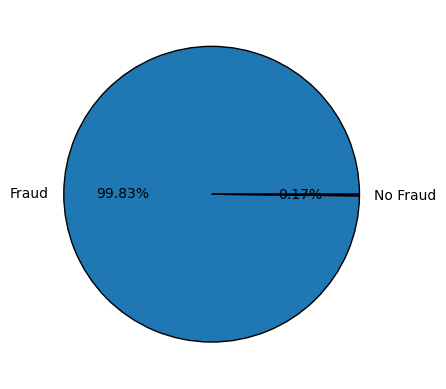

In [28]:


fraud = len(df[df['Class'] == 1]) / len(df) * 100
nofraud = len(df[df['Class'] == 0]) / len(df) * 100
fraud_percentage = [nofraud,fraud]

plt.pie(fraud_percentage,labels = ['Fraud','No Fraud'],autopct='%1.2f%%',
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})

- Our data is very very imbalanced. Only 0.17% of data, represents fraud transactions and 99.83% is non-fraud transcation 

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

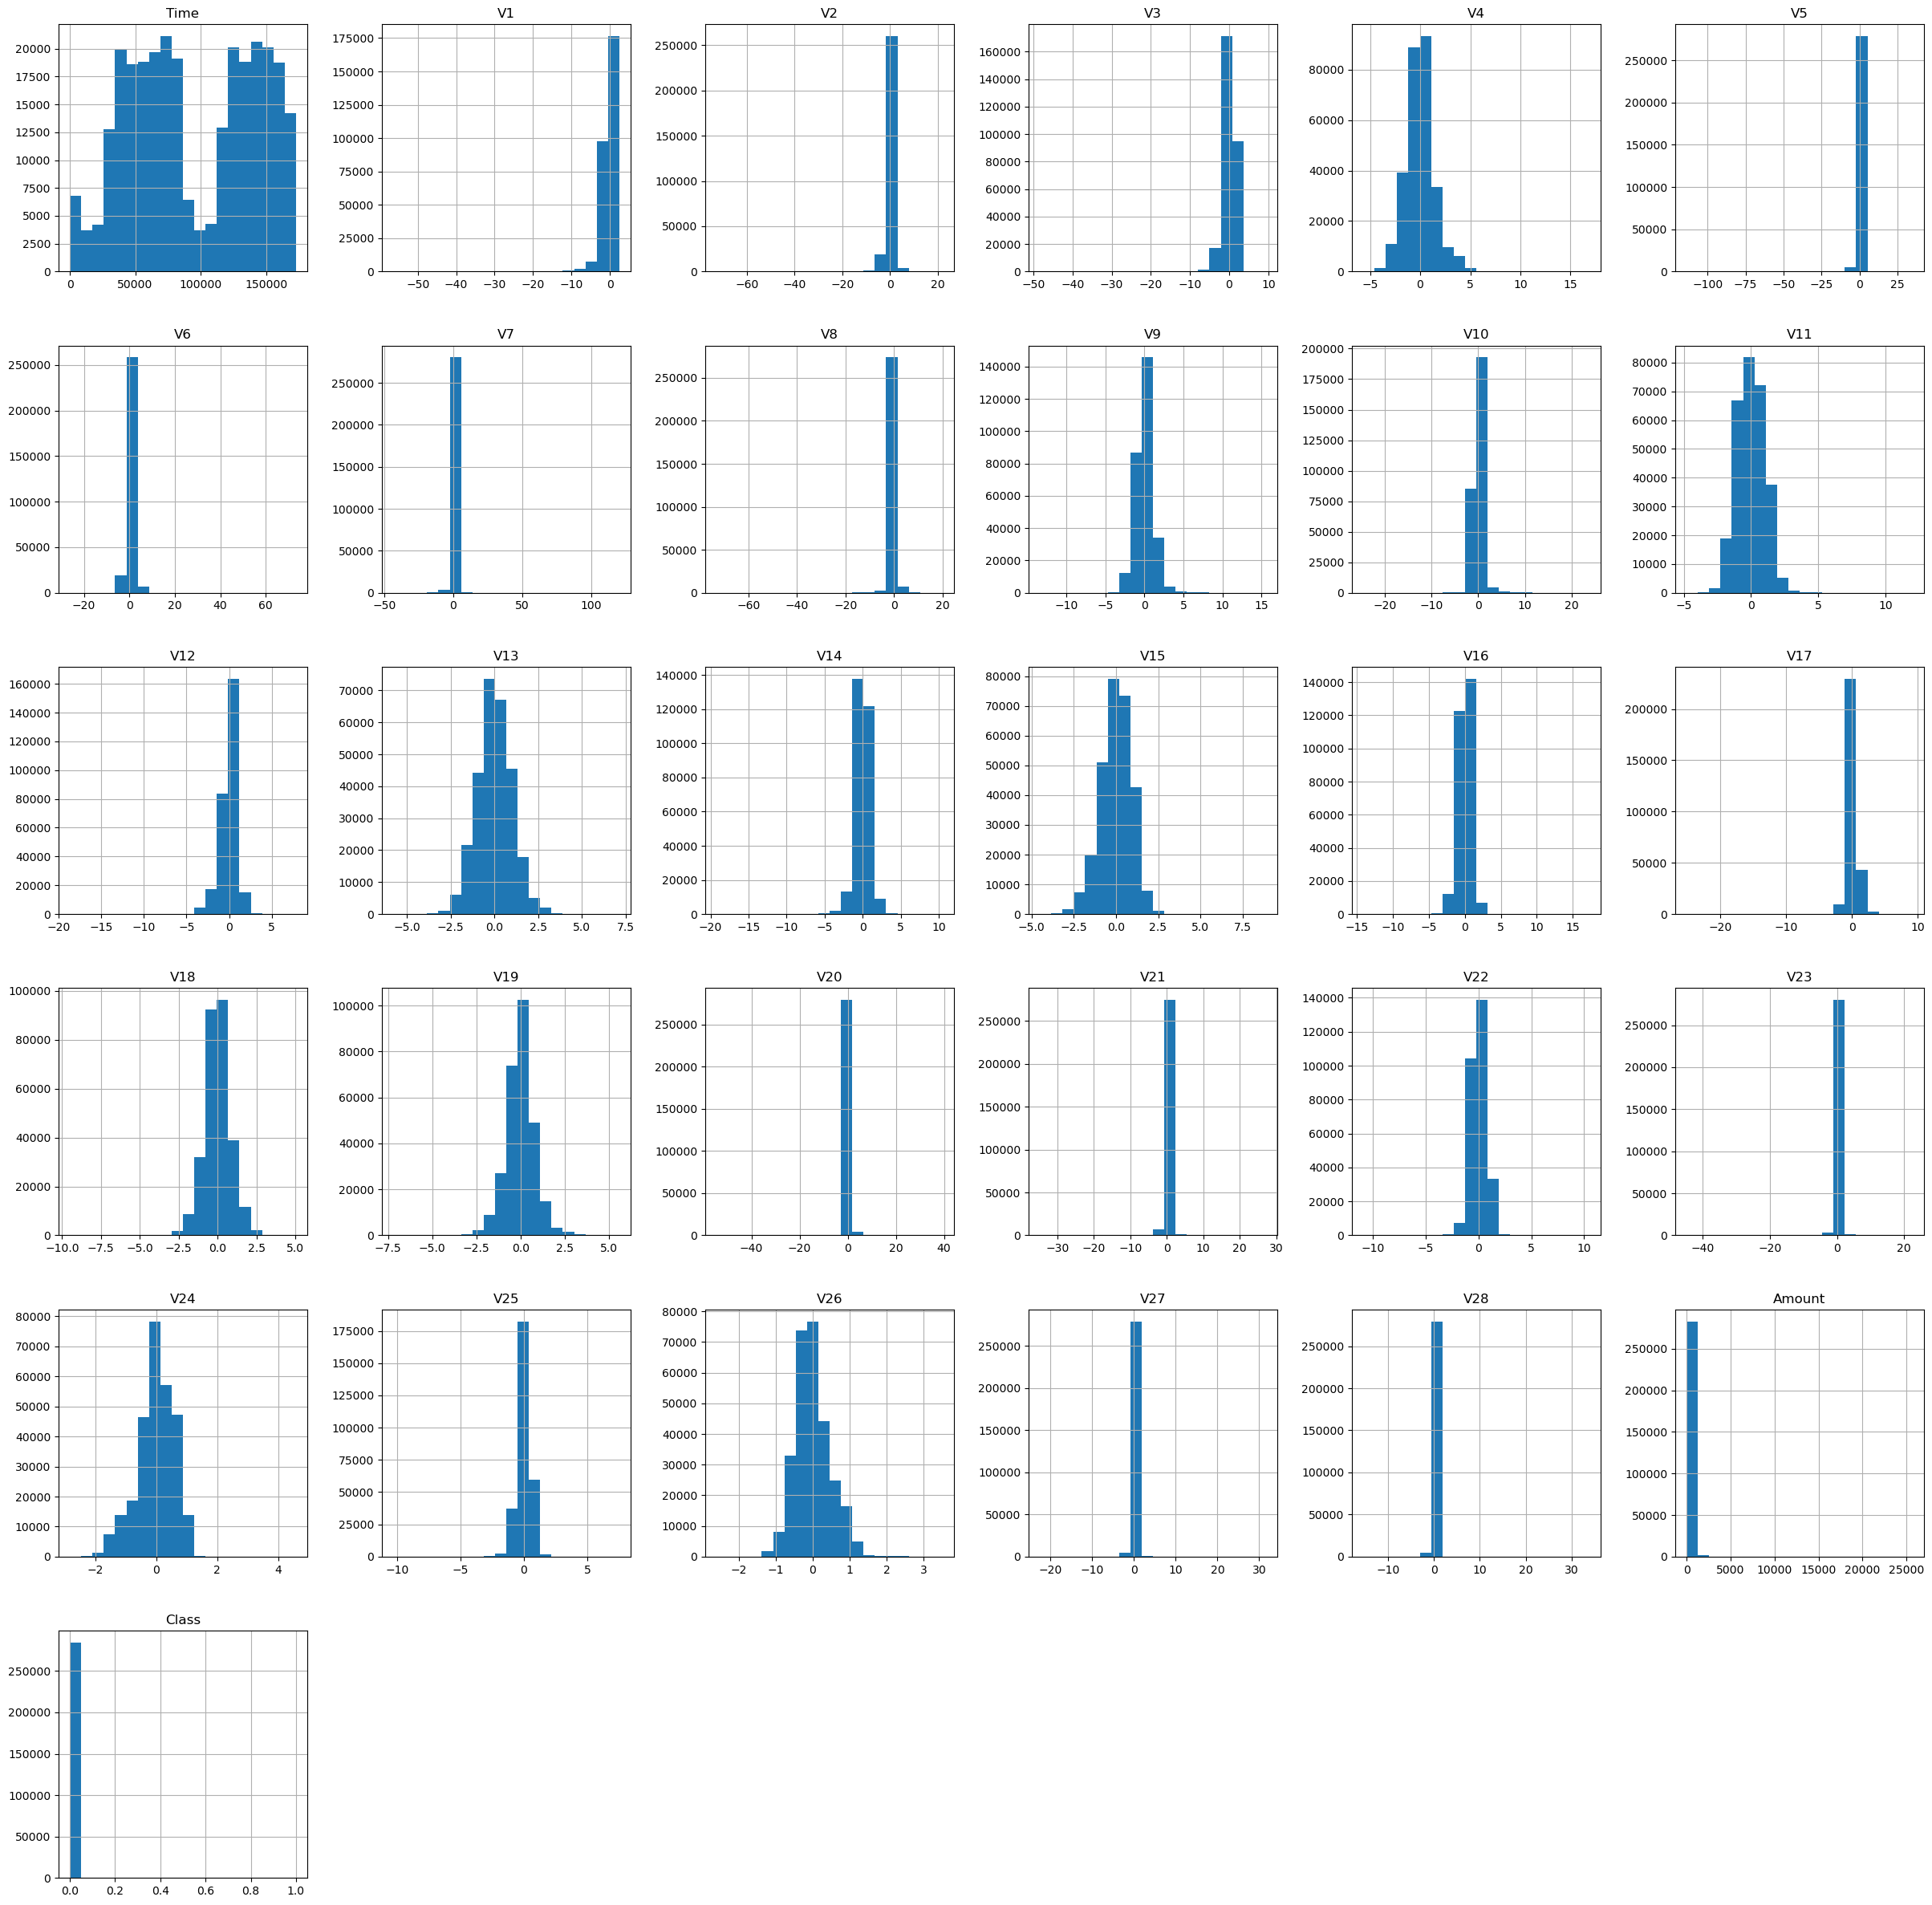

In [30]:
# Let's plot the histogram of data
df.hist(bins=20, figsize=(30,30))

- Accotding to the hist plot and df.describe, "Time" and "Amount" columns need to be scaled.

<Axes: >

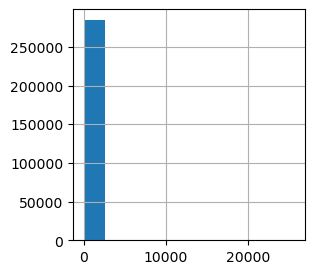

In [31]:
df['Amount'].hist(figsize=(3,3))

- "Amount" varies between 0 and 25,691. Most of it is less than 5,000. However, there are some big outliers such as 25,691 in this column. Robust scaler used for scaling data with outlier is something we need to use here to scale our data. 
- Many machine learning algorithms prefer or perform better when numerical input variables are scaled.
- Robust scaling techniques that use percentiles can be used to scale numerical input variables that contain outliers.

## Robust Scaling and Standardization 

<Axes: >

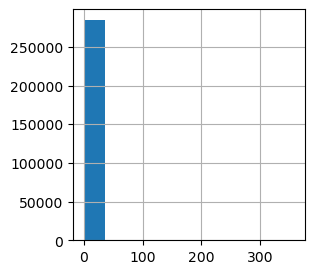

In [32]:
# Robust Scaling "Amount" Column:
scaler = RobustScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].to_numpy().reshape(-1,1))
df['Amount'].hist(figsize=(3,3))

- After robust scaling, values variy between -0.3 and 358.68
- Not very perfect but better than before having a big outlier

In [34]:
df['Amount'].describe()


count    284807.000000
mean          0.927124
std           3.495006
min          -0.307413
25%          -0.229162
50%           0.000000
75%           0.770838
max         358.683155
Name: Amount, dtype: float64

- we can do the standardization on "Time" column 
- After standardization, the values will be between 0 and 1

In [35]:
df['Time'] = (df['Time']-df['Time'].min())/(df['Time'].max()- df['Time'].min())

<Axes: >

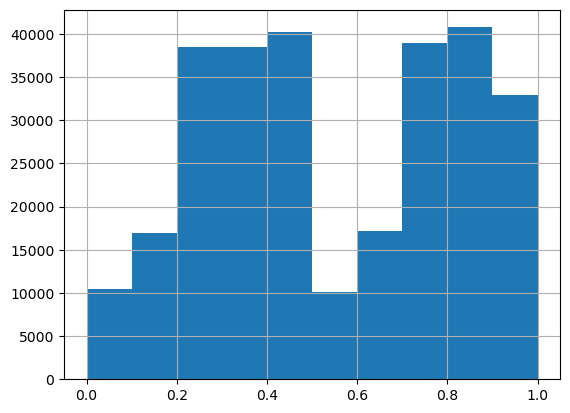

In [36]:
df['Time'].hist()
# scaled Time column has values between 0 and 1

# Train/ Validation/ Test Split

In [38]:
x_train, y_train, x_val, y_val, x_test, y_test = train_valid_test_split(df, 
                                                                        target='Class',
                                                                        train_size=0.8, 
                                                                        valid_size= 0.1, 
                                                                        test_size=0.1, random_state=1)

# Machine Learning Models for Fraud Prediction

# 1. Logistic Regression

In [39]:
def log_model(x, y):
    log_model = LogisticRegression()
    log_model.fit(x, y)
    log_score = log_model.score(x, y)
    return log_score 

In [44]:
def log_prediction(x,y, x1, y1):
    log_model = LogisticRegression()
    log_model.fit(x,y)
    y_pred_log = log_model.predict(x1)
    #log_score = log_model.score(x, y)
    report_log = print(classification_report(y1, y_pred_log, target_names=['Not Fraud', 'Fraud']))
    return report_log#, log_score

In [45]:
log_prediction(x_train,y_train, x_val, y_val)

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28441
       Fraud       0.88      0.53      0.66        40

    accuracy                           1.00     28481
   macro avg       0.94      0.76      0.83     28481
weighted avg       1.00      1.00      1.00     28481



- We observe 100% accuracy, however, high accuracy is good only if we have balanced data. Because of the imbalanced dataset, we can't just look at the accuracy from confusion matrix. Thus, We should consider precision, f-score and recall. We have high accuracy because of our imbalanced data. 

- The data is clearly highly unbalanced with majority of the transactions being No Fraud. Due to highly unbalanced data, the classification model will bias its prediction towards the majority class, No Fraud. Hence, data balancing becomes a crucial part in building a robust model.

- We will later work on balancing data to make more robust model. 

# 2. Neural Networks

In [46]:
def model_NN(x, y, x1, y1):
    model_nn = Sequential()
    model_nn.add(InputLayer((x.shape[1],)))
    model_nn.add(Dense(2, 'relu'))
    model_nn.add(BatchNormalization()) # helps model to learn better
    model_nn.add(Dense(1, 'sigmoid'))

    checkpoint = ModelCheckpoint('model_nn', save_best_only=True)
    model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model_nn.fit(x, y, validation_data=(x1, y1), epochs=5, callbacks=checkpoint)
    
    # Predicted values above 0.5 will be considered as Fraud cases and be replaced by 1 and 
    # Predicted values below or equal to 0.5 will be no Fraud cases (replaced by 0).
    y_val_pred_nn = (model_nn.predict(x1).flatten() >0.5).astype(int) # let's predict validation data
    
    nn_report = print(classification_report(y1, y_val_pred_nn, target_names=['Not Fraud', 'Fraud']))
    return nn_report

In [47]:
model_NN(x_train, y_train, x_val, y_val)



Epoch 1/5


7097/7121 [============================>.] - ETA: 0s - loss: 0.0547 - accuracy: 0.9874INFO:tensorflow:Assets written to: model_nn\assets


INFO:tensorflow:Assets written to: model_nn\assets


7121/7121 [==============================] - 9s 1ms/step - loss: 0.0545 - accuracy: 0.9874 - val_loss: 0.0039 - val_accuracy: 0.9995
Epoch 2/5
7072/7121 [============================>.] - ETA: 0s - loss: 0.0033 - accuracy: 0.9993INFO:tensorflow:Assets written to: model_nn\assets


INFO:tensorflow:Assets written to: model_nn\assets


7121/7121 [==============================] - 8s 1ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 3/5
7121/7121 [==============================] - 7s 998us/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0044 - val_accuracy: 0.9994
Epoch 4/5
7111/7121 [============================>.] - ETA: 0s - loss: 0.0032 - accuracy: 0.9994INFO:tensorflow:Assets written to: model_nn\assets


INFO:tensorflow:Assets written to: model_nn\assets


7121/7121 [==============================] - 8s 1ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 5/5
891/891 [==============================] - 1s 681us/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28441
       Fraud       0.86      0.78      0.82        40

    accuracy                           1.00     28481
   macro avg       0.93      0.89      0.91     28481
weighted avg       1.00      1.00      1.00     28481



# 3. Random Forest
Random Forest is a versatile machine learning algorithm widely used for both classification and regression tasks.

In [48]:
def random_forest_model(x,y,x1,y1):
    # Initialize the Random Forest classifier
    rf_classifier = RandomForestClassifier(max_depth=2, n_jobs=-1)

    # Train the model
    rf_classifier.fit(x, y)
    y_val_predict_rf = rf_classifier.predict(x1)
    
    report_rf = print(classification_report(y1, y_val_predict_rf ,target_names=['Not Fraud', 'Fraud']))
    return report_rf

In [49]:
random_forest_model(x_train, y_train, x_val, y_val)

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28441
       Fraud       0.92      0.55      0.69        40

    accuracy                           1.00     28481
   macro avg       0.96      0.77      0.84     28481
weighted avg       1.00      1.00      1.00     28481



# 4. Gradient Boosting Model
Gradient Boosting is a powerful machine learning technique used for regression and classification tasks. It builds an ensemble of weak learners, typically decision trees, in a sequential manner, where each tree attempts to correct the errors of its predecessor. The key idea is to minimize a loss function by adding models that correct the residuals (errors) of previous models.

In [50]:
def gradient_boosting_model(x,y,x1,y1):
    gradient_boosting = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
    gradient_boosting.fit(x, y)
    y_val_predict = gradient_boosting.predict(x1)
    report_gb = print(classification_report(y1, y_val_predict ,target_names=['Not Fraud', 'Fraud']))
    return report_gb

In [51]:
gradient_boosting_model(x_train, y_train, x_val, y_val)

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28441
       Fraud       0.81      0.65      0.72        40

    accuracy                           1.00     28481
   macro avg       0.91      0.82      0.86     28481
weighted avg       1.00      1.00      1.00     28481



# 5. Linear Support Vector Classifier Model
A Linear Support Vector Classifier (SVC) is a type of Support Vector Machine (SVM) used for classification tasks. It finds the hyperplane that best separates the data into classes with the maximum margin. When the data is linearly separable, the Linear SVC is particularly effective.

In [52]:
def Support_vector_model(x,y,x1,y1):
    Support_vector_Cl =  LinearSVC(class_weight='balanced')
    Support_vector_Cl.fit(x, y)
    
    y_val_predict_svm = Support_vector_Cl.predict(x1)
    report_svm = print(classification_report(y1, y_val_predict_svm ,target_names=['Not Fraud', 'Fraud']))
    return report_svm

In [53]:
Support_vector_model(x_train, y_train, x_val, y_val)

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28441
       Fraud       0.83      0.75      0.79        40

    accuracy                           1.00     28481
   macro avg       0.92      0.87      0.89     28481
weighted avg       1.00      1.00      1.00     28481



# Imbalanced Data Modelling Report

- This results refer to the imbalanced data. In order to get more accurate model for prediction, we need to prepare balanced data out of imbalanced data. To do so, we can do undersampling by having only the same amounts of both fraud and not fraud classes. 



- Logistic Regression Model Classification on Validation data:

                        precision    recall     f1-score
       - Not Fraud       1.00          1.00        1.00
       - Fraud           0.88          0.53        0.66        
- Neural Network Model Classification on Validation data:

                        precision    recall     f1-score           
       - Not Fraud       1.00          1.00        1.00
       - Fraud           0.84          0.78        0.81           
- Random Forest on Validation data:

                        precision    recall     f1-score     
       - Not Fraud       1.00         1.00        1.00
       - Fraud           0.91         0.53        0.67          
- Gradient Boorting on Validation data:

                        precision    recall     f1-score     
       - Not Fraud       1.00          1.00        1.00
       - Fraud           0.81          0.65        0.72  
       
- Support Vector Machine on Validation data:

                        precision    recall     f1-score
       - Not Fraud       1.00          1.00        1.00
       - Fraud           0.84          0.78        0.81        


 - As we can see the results obtained from unbalanced data is not desired. we get 100% of precision and recall for not sraud datadue to imbalanced data. Thus, we will focus on making data balanced and then will make the models for prediction. 

In [54]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


# Dealing with Imbalanced Data
### Problem with imbalanced data:
Usually, the minority class tends to be more important. The model's efficacy depends on being able to predict the minority class correctly. Machine learning models are also designed to be working on balanced data. Thus, they are unable to distinguish the minority class. Models tend to predict the dominant class. The accuracy of imbalanced data will  be misleading. 

There are 3 ways to deal with imbalanced data. 
- Data-level: Resampling data
- Model-level methods
- Metrics-level methods (Evaluation metrics)

## Re-Sampling
- Over-sampling: Duplicating samples from the minority class
- Under-sampling: Deleting samples from the minority class

Both of these methods, we creat a transformed version of data in which there is a new class distributin to decrease the impact of imbalanced data in our modeling and results of prediction. 

In [55]:
df.groupby('Class').size()/df.shape[0]
# We have highly imbalanced data. Only 1.7% Fraud data and 99.83% not fraud data.

Class
0    0.998273
1    0.001727
dtype: float64

In [56]:
class_0 = df[df['Class'] == 0] # Not fraud 
class_1 = df[df['Class'] == 1] # Fraud
# print the shape of the class
print('Not Fraud 0:', class_0.shape)
print('Fraud 1:', class_1.shape)

Not Fraud 0: (284315, 31)
Fraud 1: (492, 31)


In [57]:
# Data frame with only fraud data of 492 rows
#class_0
class_1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,0.002350,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.307413,1
623,0.002732,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,7.084469,1
4920,0.025823,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,3.045204,1
6108,0.040430,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,0.517013,1
6329,0.043515,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.293440,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,0.978876,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,5.142178,1
280143,0.980063,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.296793,1
280149,0.980086,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,0.780968,1
281144,0.983645,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,3.116048,1


In [58]:
# First, we will count fraud and non-fraud data as follow:
class_count_0, class_count_1 = df['Class'].value_counts()

# Let's get some sample of not fraud data with the "number of fraud data" that we have
class_0_under = class_0.sample(class_count_1)

In [62]:
# Data frame with only non fraud data of 492 rows
class_0_under

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
104478,0.399793,-0.737425,0.838369,2.221541,-0.019128,0.230401,0.055169,0.659819,0.018357,-0.368356,...,0.281212,0.890027,-0.306297,0.207579,0.015930,-0.447960,-0.182238,-0.121685,-0.198561,0
136730,0.473633,0.036536,0.876464,0.734318,0.184353,-0.355993,-0.123391,-0.912564,-2.682906,-0.378039,...,-1.576159,-0.628768,0.035835,-0.160237,0.750049,0.183316,-0.029668,0.156490,-0.279746,0
225494,0.834946,2.199448,-1.577841,0.080096,-1.451175,-1.943155,-0.405803,-1.691476,-0.064073,-0.791207,...,-0.109465,0.236120,0.325771,-0.089798,-0.542356,-0.253118,0.069810,-0.025600,0.133445,0
58456,0.280082,-1.072967,0.714854,2.189631,-0.483308,-0.871111,0.487923,0.916659,0.058455,0.232563,...,0.382099,1.148875,-0.152430,0.096475,-0.240920,-0.598638,0.001269,0.106063,2.091246,0
256795,0.913613,-0.313323,0.632376,0.295129,-0.633752,0.521940,-0.927915,0.872894,-0.103641,-0.228998,...,-0.201694,-0.422014,0.277154,0.066153,-0.492290,0.110905,0.139240,0.061240,-0.207643,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183415,0.727974,2.023006,-0.125107,-1.215659,0.203066,0.158408,-0.565855,0.089594,-0.155441,0.261834,...,-0.249544,-0.616532,0.274399,-0.457554,-0.283298,0.206474,-0.071512,-0.072657,-0.167819,0
146565,0.507905,-3.018245,2.604611,-0.794039,-2.633154,-0.920686,-1.812767,0.070555,1.226801,0.485731,...,-0.245422,-0.730505,0.165052,0.517555,0.166445,0.352093,0.472570,0.337277,-0.293440,0
120073,0.438105,1.161192,-0.026492,1.287299,1.340608,-0.989193,-0.204973,-0.575183,0.099982,0.912682,...,-0.066610,0.017894,0.001337,0.392066,0.411931,-0.408342,0.072410,0.037289,-0.237686,0
165185,0.678596,1.772286,-0.474773,-1.850441,0.322226,0.268958,-0.898723,0.599313,-0.361209,0.458479,...,-0.055848,-0.509411,0.090419,0.550553,-0.028411,-0.532702,-0.068251,-0.020839,2.110529,0


- After having the same number of fraud and non-fraud data, we can concatenate two fraud and not-fraud data frames.

In [63]:
balanced_df = pd.concat([class_0_under, class_1], axis=0)

In [64]:
balanced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
104478,0.399793,-0.737425,0.838369,2.221541,-0.019128,0.230401,0.055169,0.659819,0.018357,-0.368356,...,0.281212,0.890027,-0.306297,0.207579,0.015930,-0.447960,-0.182238,-0.121685,-0.198561,0
136730,0.473633,0.036536,0.876464,0.734318,0.184353,-0.355993,-0.123391,-0.912564,-2.682906,-0.378039,...,-1.576159,-0.628768,0.035835,-0.160237,0.750049,0.183316,-0.029668,0.156490,-0.279746,0
225494,0.834946,2.199448,-1.577841,0.080096,-1.451175,-1.943155,-0.405803,-1.691476,-0.064073,-0.791207,...,-0.109465,0.236120,0.325771,-0.089798,-0.542356,-0.253118,0.069810,-0.025600,0.133445,0
58456,0.280082,-1.072967,0.714854,2.189631,-0.483308,-0.871111,0.487923,0.916659,0.058455,0.232563,...,0.382099,1.148875,-0.152430,0.096475,-0.240920,-0.598638,0.001269,0.106063,2.091246,0
256795,0.913613,-0.313323,0.632376,0.295129,-0.633752,0.521940,-0.927915,0.872894,-0.103641,-0.228998,...,-0.201694,-0.422014,0.277154,0.066153,-0.492290,0.110905,0.139240,0.061240,-0.207643,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,0.978876,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,5.142178,1
280143,0.980063,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.296793,1
280149,0.980086,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,0.780968,1
281144,0.983645,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,3.116048,1


- After making data balanced, we can find the sample size:

In [65]:
balanced_df.groupby('Class').size()/balanced_df.shape[0] 

Class
0    0.5
1    0.5
dtype: float64

- Now we have same percentage of fraud and not-fraud data in "Class" column
- The balanced_df can be used to predict the fraud or not-fraud implementing previously discussed models.

# Train/ Validation/ Test Split_ Balanced Data

In [66]:

x_train_b, y_train_b, x_val_b, y_val_b, x_test_b, y_test_b = train_valid_test_split(balanced_df, 
                                                                        target='Class',
                                                                        train_size=0.8, 
                                                                        valid_size= 0.1, 
                                                                        test_size=0.1, random_state=1)

In [67]:
x_train_b.shape, y_train_b.shape, x_val_b.shape, y_val_b.shape, x_test_b.shape, y_test_b.shape

((787, 30), (787,), (98, 30), (98,), (99, 30), (99,))

# 6. Logistic Regression_ Balanced Data

In [68]:
def log_prediction_balanced(x,y, x1, y1):
    log_model_b = LogisticRegression()
    log_model_b.fit(x,y)
    y_pred_log_b = log_model_b.predict(x1)
    report_log_b = print(classification_report(y1, y_pred_log_b, target_names=['Not Fraud', 'Fraud']))
    return report_log_b


Report_Log_Balanced = log_prediction(x_train_b, y_train_b, x_val_b, y_val_b)
Report_Log_Balanced

              precision    recall  f1-score   support

   Not Fraud       0.94      0.92      0.93        49
       Fraud       0.92      0.94      0.93        49

    accuracy                           0.93        98
   macro avg       0.93      0.93      0.93        98
weighted avg       0.93      0.93      0.93        98



# 7. Neural Networks_ Balanced Data

In [70]:
def model_NN_balanced(x, y, x1, y1):
    model_nn_b = Sequential()
    model_nn_b.add(InputLayer((x.shape[1],)))
    model_nn_b.add(Dense(2, 'relu'))
    model_nn_b.add(BatchNormalization()) # helps model to learn better
    model_nn_b.add(Dense(1, 'sigmoid'))

    checkpoint = ModelCheckpoint('model_nn_b', save_best_only=True)
    model_nn_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model_nn_b.fit(x, y, validation_data=(x1, y1), epochs=5, callbacks=checkpoint)
    
    # Predicted values above 0.5 will be considered as Fraud cases and be replaced by 1 and 
    # Predicted values below or equal to 0.5 will be no Fraud cases (replaced by 0).
    y_val_pred_nn_b = (model_nn_b.predict(x1).flatten() >0.5).astype(int) # let's predict validation data
    
    nn_report_b = print(classification_report(y1, y_val_pred_nn_b, target_names=['Not Fraud', 'Fraud']))
    return nn_report_b

Report_NN_Balanced = model_NN_balanced(x_train_b, y_train_b, x_val_b, y_val_b)
Report_NN_Balanced

Epoch 1/5
 1/25 [>.............................] - ETA: 14s - loss: 0.5561 - accuracy: 0.8438INFO:tensorflow:Assets written to: model_nn_b\assets


INFO:tensorflow:Assets written to: model_nn_b\assets


25/25 [==============================] - 1s 26ms/step - loss: 0.6337 - accuracy: 0.7179 - val_loss: 0.6914 - val_accuracy: 0.7143
Epoch 2/5
 1/25 [>.............................] - ETA: 0s - loss: 0.5693 - accuracy: 0.7812INFO:tensorflow:Assets written to: model_nn_b\assets


INFO:tensorflow:Assets written to: model_nn_b\assets


25/25 [==============================] - 0s 20ms/step - loss: 0.5408 - accuracy: 0.7992 - val_loss: 0.5191 - val_accuracy: 0.8061
Epoch 3/5
 1/25 [>.............................] - ETA: 0s - loss: 0.4375 - accuracy: 0.8438INFO:tensorflow:Assets written to: model_nn_b\assets


INFO:tensorflow:Assets written to: model_nn_b\assets


25/25 [==============================] - 0s 21ms/step - loss: 0.4991 - accuracy: 0.8081 - val_loss: 0.4192 - val_accuracy: 0.8776
Epoch 4/5
 1/25 [>.............................] - ETA: 0s - loss: 0.6180 - accuracy: 0.7812INFO:tensorflow:Assets written to: model_nn_b\assets


INFO:tensorflow:Assets written to: model_nn_b\assets


25/25 [==============================] - 0s 20ms/step - loss: 0.4588 - accuracy: 0.8323 - val_loss: 0.3663 - val_accuracy: 0.8878
Epoch 5/5
 1/25 [>.............................] - ETA: 0s - loss: 0.4086 - accuracy: 0.8125INFO:tensorflow:Assets written to: model_nn_b\assets


INFO:tensorflow:Assets written to: model_nn_b\assets


4/4 [==============================] - 0s 0s/step
              precision    recall  f1-score   support

   Not Fraud       0.84      0.96      0.90        49
       Fraud       0.95      0.82      0.88        49

    accuracy                           0.89        98
   macro avg       0.90      0.89      0.89        98
weighted avg       0.90      0.89      0.89        98



# 8. Random Forest_ Balanced Data

In [71]:
def random_forest_model_balanced(x,y,x1,y1):
    # Initialize the Random Forest classifier
    rf_classifier_b = RandomForestClassifier(max_depth=2, n_jobs=-1)

    # Train the model
    rf_classifier_b.fit(x, y)
    y_val_predict_rf_b = rf_classifier_b.predict(x1)
    
    report_rf_b= print(classification_report(y1, y_val_predict_rf_b ,target_names=['Not Fraud', 'Fraud']))
    return report_rf_b


Report_RF_Balanced = random_forest_model_balanced(x_train_b, y_train_b, x_val_b, y_val_b)
Report_RF_Balanced

              precision    recall  f1-score   support

   Not Fraud       0.84      1.00      0.92        49
       Fraud       1.00      0.82      0.90        49

    accuracy                           0.91        98
   macro avg       0.92      0.91      0.91        98
weighted avg       0.92      0.91      0.91        98



# 9. Gradient Boosting Model_ Balanced Data

In [72]:
def gradient_boosting_model_balanced(x,y,x1,y1):
    gradient_boosting_b = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
    gradient_boosting_b.fit(x, y)
    y_val_predict_b = gradient_boosting_b.predict(x1)
    report_gb_b = print(classification_report(y1, y_val_predict_b ,target_names=['Not Fraud', 'Fraud']))
    return report_gb_b



Report_GB_Balanced = gradient_boosting_model(x_train_b, y_train_b, x_val_b, y_val_b)
Report_GB_Balanced

              precision    recall  f1-score   support

   Not Fraud       0.93      0.88      0.91        49
       Fraud       0.88      0.94      0.91        49

    accuracy                           0.91        98
   macro avg       0.91      0.91      0.91        98
weighted avg       0.91      0.91      0.91        98



# 10. Linear Support Vector Classifier Model _ Balanced Data

In [73]:
def Support_vector_model_balanced(x,y,x1,y1):
    Support_vector_Cl_b =  LinearSVC(class_weight='balanced')
    Support_vector_Cl_b.fit(x, y)
    
    y_val_predict_svm_b = Support_vector_Cl_b.predict(x1)
    report_svm_b = print(classification_report(y1, y_val_predict_svm_b ,target_names=['Not Fraud', 'Fraud']))
    return report_svm_b

Report_SVM_Balanced = Support_vector_model_balanced(x_train_b, y_train_b, x_val_b, y_val_b)
Report_SVM_Balanced

              precision    recall  f1-score   support

   Not Fraud       0.92      0.96      0.94        49
       Fraud       0.96      0.92      0.94        49

    accuracy                           0.94        98
   macro avg       0.94      0.94      0.94        98
weighted avg       0.94      0.94      0.94        98



# Imbalanced Data Modelling Report
- Logistic Regression Model Classification on Validation data:

                        precision    recall     f1-score     accuracy 
       - Not Fraud        0.94        0.98        0.96          0.93
       - Fraud            0.98        0.94        0.96            
       
- Neural Network Model Classification on Validation data:

                        precision    recall     f1-score     accuracy
       - Not Fraud        0.96        0.90        0.93         0.89
       - Fraud            0.90        0.96        0.93        
       
- Random Forest on Validation data:

                        precision    recall     f1-score    accuracy
       - Not Fraud        0.89        1.00        0.94         0.91
       - Fraud            1.00        0.88        0.93             
       
- Gradient Boorting on Validation data:

                        precision    recall     f1-score    accuracy 
       - Not Fraud       0.92         0.98        0.95        0.91
       - Fraud           0.98         0.92        0.95              
       
- Support Vector Machine on Validation data:
       
                        precision    recall     f1-score    accuracy
       - Not Fraud       0.91         0.98        0.94        0.94
       - Fraud           0.98         0.90        0.94        

- Support Vector Classifier and Logistic Regession models both have the highest accuracy of 0.94 on train data. 
- We chose the two abovementioned models for testing our data. 

# Predicting Test Data 

# 11. Test prediction on Logistic Regression

- Let's predict our test data using our logistic model

In [76]:
log_model_b = LogisticRegression()
log_model_b.fit(x_train_b,y_train_b)
print(classification_report(y_test_b, log_model_b.predict(x_test_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.88      0.93      0.91        46
       Fraud       0.94      0.89      0.91        53

    accuracy                           0.91        99
   macro avg       0.91      0.91      0.91        99
weighted avg       0.91      0.91      0.91        99



- Our Logistic Regression model shows a decrease from 93% for train/val dayta to 91% accuracy for test data.

# 12. Test prediction on Support Vector Classfier

In [77]:
Support_vector_Cl_b =  LinearSVC(class_weight='balanced')
Support_vector_Cl_b.fit(x_train_b, y_train_b)

report_svc_b_test = print(classification_report(y_test_b, Support_vector_Cl_b.predict(x_test_b) ,target_names=['Not Fraud', 'Fraud']))
report_svc_b_test

              precision    recall  f1-score   support

   Not Fraud       0.88      0.93      0.91        46
       Fraud       0.94      0.89      0.91        53

    accuracy                           0.91        99
   macro avg       0.91      0.91      0.91        99
weighted avg       0.91      0.91      0.91        99



- Our Support Vector Classifier model shows a decrease from 94% for train/val data to 91% accuracy for test data.
- Based on our preference, we can choose the appropriate model for our data